In [8]:
from tensorflow import keras
import tensorflow.keras.layers as layers

import numpy as np
import matplotlib.pyplot as plt

In [64]:
# Help functions
def plot_loss(h):
    plt.title("Loss history")
    plt.plot(h.history['loss'])
    plt.xlabel("# of epoch")
    plt.ylabel("loss")
    plt.grid(True)
    plt.show()
    
def plot_acc(h):
    plt.title("Accuracy history")
    plt.plot(h.history['sparse_categorical_accuracy'], color='red')
    plt.xlabel("# of epoch")
    plt.ylabel("accuracy")
    plt.grid(True)
    plt.show()

In [11]:
# define a model
inputs = keras.Input(shape=(28*28,), name='input')
x = layers.Dense(64, activation='relu', name='dense_1')(inputs)
x = layers.Dense(64, activation='relu', name='dense_2')(x)
outputs = layers.Dense(10, activation='softmax', name='prediction')(x)

model = keras.Model(inputs=inputs, outputs=outputs)

In [12]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [13]:
x_train = x_train.reshape(60_000, 784).astype('float32') / 255
x_test = x_test.reshape(10_000, 784).astype('float32') / 255

In [15]:
y_train = y_train.astype('float32')
y_test = y_test.astype('float32')

In [19]:
# validation split
x_val = x_train[-10_000:]
y_val = y_train[-10_000:]

x_train = x_train[:-10_000]
y_train = y_train[:-10_000]

In [25]:
model.compile(optimizer='adam',
              loss = keras.losses.SparseCategoricalCrossentropy(),
              metrics = [keras.metrics.SparseCategoricalAccuracy()])

In [61]:
%%time
history = model.fit(x_train, y_train,
                    batch_size=32, epochs=10,
                    validation_data=(x_val, y_val))

Epoch 1/10
1563/1563 [==============================] - 3s 2ms/step - loss: 0.0642 - sparse_categorical_accuracy: 0.9790 - val_loss: 0.1023 - val_sparse_categorical_accuracy: 0.9734
Epoch 2/10
1563/1563 [==============================] - 3s 2ms/step - loss: 0.0394 - sparse_categorical_accuracy: 0.9868 - val_loss: 0.0985 - val_sparse_categorical_accuracy: 0.9751
Epoch 3/10
1563/1563 [==============================] - 3s 2ms/step - loss: 0.0360 - sparse_categorical_accuracy: 0.9879 - val_loss: 0.1050 - val_sparse_categorical_accuracy: 0.9737
Epoch 4/10
1563/1563 [==============================] - 3s 2ms/step - loss: 0.0317 - sparse_categorical_accuracy: 0.9891 - val_loss: 0.1090 - val_sparse_categorical_accuracy: 0.9765
Epoch 5/10
1563/1563 [==============================] - 3s 2ms/step - loss: 0.0282 - sparse_categorical_accuracy: 0.9905 - val_loss: 0.1144 - val_sparse_categorical_accuracy: 0.9740
Epoch 6/10
1563/1563 [==============================] - 3s 2ms/step - loss: 0.0273 - spars

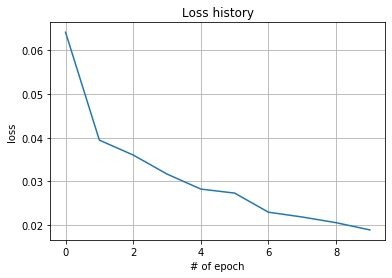

In [65]:
plot_loss(history)

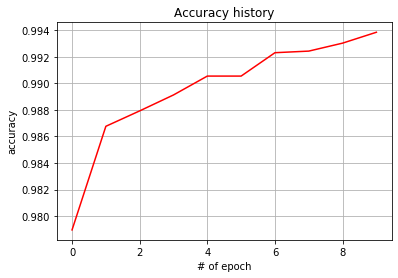

In [66]:
plot_acc(history)